# 7027 HW2 random forest and GBM model

In [1]:
# load the packages 
import numpy as np
import pandas as pd


In [2]:
# 导入csv
original_df = pd.read_csv('HW2_house_dataset.csv')
# 分类变量转化为数字
mapping = {'very_good': 5, 'good': 4, 'average': 3,'fair': 2,'poor': 1}
original_df['condition'] = original_df['condition'].replace(mapping)
original_df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,year_renovated,zip_code,lattitude,longitude,nn_sqft_living,nn_sqft_lot
0,1,5.346157,3,1.00,1180,5650,1.0,0,0,3,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,2,5.730782,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,3,5.255273,2,1.00,770,10000,1.0,0,0,3,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,4,5.781037,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,5,5.707570,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [3]:
x = original_df.drop('price',axis = 1)#删除isrun列，剩余字段全为特征列
y = original_df['price']

# 1st part: Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [7]:
#超参数搜索花费时间较长，无需重复跑
def random_forest_parameter_tuning1(feature_data, label_data):

 
    X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.20)
    param_test1 = {
        'max_features':[4,5],
        'min_samples_split':[2,3],
        'max_depth':[10,20],
    }
    model = GridSearchCV(estimator=RandomForestRegressor(
        random_state=10), param_grid=param_test1, cv=5
    )

    model.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model.predict(X_test)
    # 计算准确率
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    print(RMSE)
    return model.best_score_, model.best_params_

random_forest_parameter_tuning1(x,y)

0.07812455395213129


(0.8755833232402891,
 {'max_depth': 20, 'max_features': 5, 'min_samples_split': 2})

In [19]:
#单单跑一次最优模型
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
random_forest_model=RandomForestRegressor(max_features=5,min_samples_split=2,max_depth=20,random_state=10)
random_forest_model.fit(X_train,y_train)

# Predict test set data
random_forest_predict=random_forest_model.predict(X_test)
MSE=mean_squared_error(y_test, random_forest_predict)
RMSE=np.sqrt(MSE)
print(MSE)
print(RMSE)

0.006463328274965077
0.08039482741423777


Text(0.5, 1.0, 'Variable Importances')

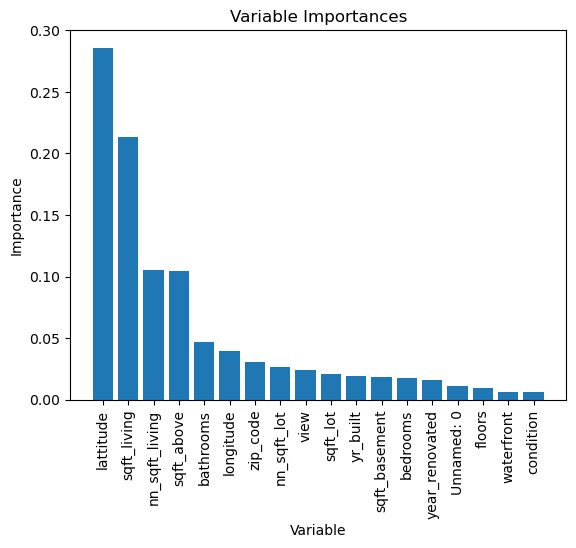

In [20]:
# 变量的重要性
import matplotlib.pyplot as plt
train_X_column_name=list(X_train.columns)
random_forest_importance=list(random_forest_model.feature_importances_)
random_forest_feature_importance=[(feature,round(importance,8)) 
                                  for feature, importance in zip(train_X_column_name,random_forest_importance)]
random_forest_feature_importance=sorted(random_forest_feature_importance,key=lambda x:x[1],reverse=True)
plt.figure(3)
plt.clf()
importance_plot_x_values=list(range(len(random_forest_importance)))
plt.bar(importance_plot_x_values,[item[1] for item in random_forest_feature_importance],orientation='vertical')
plt.xticks(importance_plot_x_values,[item[0] for item in random_forest_feature_importance],rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

c:\Users\sjtuz\anaconda3\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


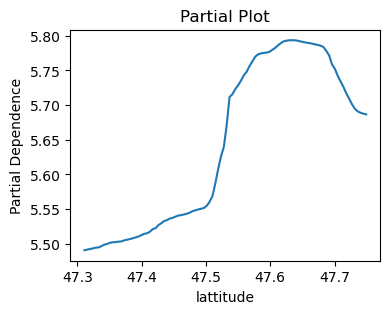

In [21]:
#绘制最重要的变量的PDP图
# Calculate the partial dependence and feature values
from sklearn.inspection import partial_dependence
features = X_train.columns.get_loc('lattitude') #get the column index for the column we want
pdp= partial_dependence(random_forest_model,X_train,features)
grid_values1, grid_values2, average = pdp['grid_values'], pdp['values'], pdp['average']   #这里是2024.1.28晚上灾难现场。本应该输出2个值的函数输出了三个值。整了一晚上。
fig = plt.figure(figsize=(4,3))
plt.plot(grid_values2[0], average[0])
plt.xlabel('lattitude')
plt.ylabel('Partial Dependence')
plt.title('Partial Plot')
plt.show()

# 2nd part: GBM model

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [8]:
#超参数搜索花费时间较长(约10分钟)，无需重复跑
#计算出的最优参数组合为{'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 5}
#RMSE=0.07547134985160697
#best score=0.8859550785945949
def GBM_parameter_tuning1(feature_data, label_data):
    X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, test_size=0.20)
    param_test1= {
        'learning_rate':[0.1,0.2],
        'min_samples_leaf':[3,5],
        'max_depth':[10,20],
    }
    model = GridSearchCV(estimator=GradientBoostingRegressor(
        random_state=10), param_grid=param_test1, cv=5
    )

    model.fit(X_train, y_train)
    # 对测试集进行预测
    y_pred = model.predict(X_test)
    # 计算准确率
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    print(RMSE)
    return model.best_score_, model.best_params_

GBM_parameter_tuning1(x,y)

0.07547134985160697


(0.8859550785945949,
 {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 5})

In [10]:
#单单跑一次最优模型
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
best_GBM_model=GradientBoostingRegressor(learning_rate=0.1,min_samples_leaf=5,max_depth=10,random_state=10)
best_GBM_model.fit(X_train,y_train)

# Predict test set data
GBM_predict=best_GBM_model.predict(X_test)
MSE=mean_squared_error(y_test, GBM_predict)
RMSE=np.sqrt(MSE)
print(MSE)
print(RMSE)

0.005733094611794321
0.07571720155812893


In [11]:
# 变量的重要性
import matplotlib.pyplot as plt
train_X_column_name=list(X_train.columns)
GBM_importance=list(best_GBM_model.feature_importances_)
GBM_feature_importance=[(feature,round(importance,8)) 
                                  for feature, importance in zip(train_X_column_name,GBM_importance)]
GBM_feature_importance=sorted(GBM_feature_importance,key=lambda x:x[1],reverse=True)
print(GBM_feature_importance)

[('sqft_living', 0.45802412), ('lattitude', 0.33939462), ('longitude', 0.05441011), ('nn_sqft_living', 0.03376356), ('sqft_above', 0.01680126), ('sqft_lot', 0.01450116), ('nn_sqft_lot', 0.01398694), ('view', 0.0135058), ('year_renovated', 0.01097222), ('zip_code', 0.01056397), ('yr_built', 0.0071121), ('Unnamed: 0', 0.0063723), ('condition', 0.00560044), ('waterfront', 0.00461417), ('bathrooms', 0.00435815), ('bedrooms', 0.0024761), ('sqft_basement', 0.00241081), ('floors', 0.00113216)]


Text(0.5, 1.0, 'Variable Importances')

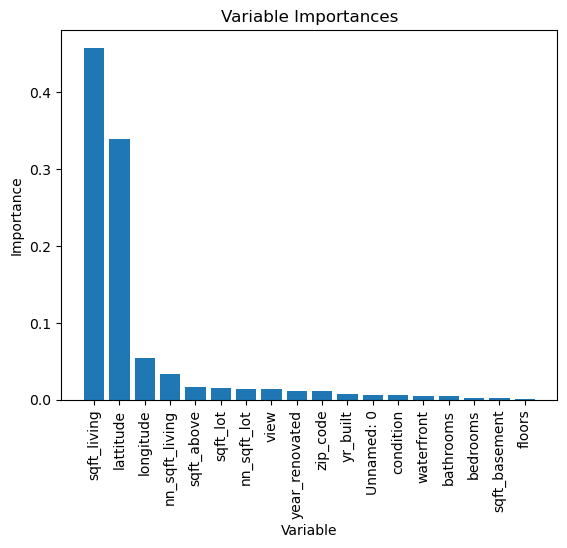

In [15]:
plt.figure(3)
plt.clf()
importance_plot_x_values=list(range(len(GBM_feature_importance)))
plt.bar(importance_plot_x_values,[item[1] for item in GBM_feature_importance],orientation='vertical')
plt.xticks(importance_plot_x_values,[item[0] for item in GBM_feature_importance],rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importances')

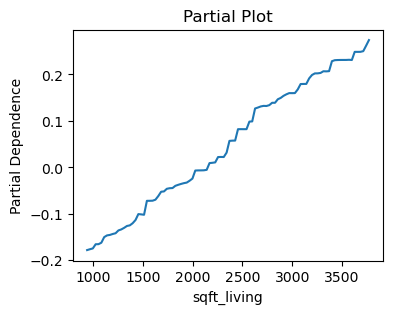

In [22]:
#绘制最重要的变量的PDP图
# Calculate the partial dependence and feature values
from sklearn.inspection import partial_dependence
features = X_train.columns.get_loc('sqft_living') #get the column index for the column we want
pdp= partial_dependence(best_GBM_model,X_train,features)
grid_values1, grid_values2, average = pdp['grid_values'], pdp['values'], pdp['average']   #这里是2024.1.28晚上灾难现场。本应该输出2个值的函数输出了三个值。整了一晚上。
fig = plt.figure(figsize=(4,3))
plt.plot(grid_values2[0], average[0])
plt.xlabel('sqft_living')
plt.ylabel('Partial Dependence')
plt.title('Partial Plot')
plt.show()

Conclusion about RMSE:
random forest: 0.0781 on validation data; 0.0804 on test data
GBM: 0.0754 on validation data; 0.0757 on test data
Validation performances better than testing performances.
GBM performs better than RF.